# Spaceship Titanic
Predict which passengers are transported to an alternate dimension

# 0.Data Load

In [117]:
import io

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 

In [45]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


## 0.1 Train.csv
1. Description
    - Personal record for about two-thirds (~8,700) of th passengers, to be used as training data 
2. features
    - `PassengerId`: a unique id for each passenger
        - form: `gggg_pp`
        - `gggg`: a group the passenger is traveling with 
        - `pp`: number within the group
            - often family  members, but not always
        - same with train_df and test_df
    - `HomePlanet`: planet the passenger departed from
    - `CryoSleep`: whether the passenger elected to be put into suspended animation during voyage 
        - ***Passengers in cryosleep are confined to their cabins ***
    - `Cabin`: cabin number where ther passengers is staying 
        - form: `deck/num/side`
            - `side`: `P`(Port) OR `S`(Starboard)
    - `Destination`: planet the passenger will be debarking to 
    - `Age`: passenger age
    - `VIP`: whether the passenger has paid for special VIP service during the voyage
    - `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: amount the passenger has billed at each of the luxury amenities
    - `Name`: first/last names of the passenger
    - `Transported`: whether the passenger was transported to another dimension
        - TARGET LABEL to PREDICT 
            - TRUE or FALSE

In [91]:
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [92]:
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


# 1.Preprocessing 

## 1.1 EDA
1. `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: payment for luxury
    - Big gap between MEAN and MEDIAN 
    - Big gap between MEAN and MAX 
    - RESULT
        - ***need 1) scaling 2) outlier replacement*** 

In [93]:
# NULL --> misisng values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [94]:
# luxury --> outliers  
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## 1.2 Missing Value
- replace missing values with 
    - float --> MEDIAN
    - object --> MODE 

In [95]:
train_df.fillna(train_df.median(), inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<ipython-input-95-8d4594e71f07>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.fillna(train_df.median(), inplace=True)


In [96]:
miss_dic = train_df.isnull().sum().to_dict()
null_obj = pd.DataFrame({i for i in miss_dic if miss_dic[i]>0})
list(null_obj[0])

['Name', 'Cabin', 'HomePlanet', 'Destination']

In [97]:
# Name: Not useful for analyiss ==> DROP the COLUMN
train_df = train_df.drop(columns=['Name'])

In [112]:
# fill remaining missing values with MODE 
null_obj = ['Cabin', 'HomePlanet', 'Destination']
for col in null_obj:
    # mode()[0] <-- [0] indexing is IMPORTANT 
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])  
train_df.isnull().sum()   

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## 1.3 outlier

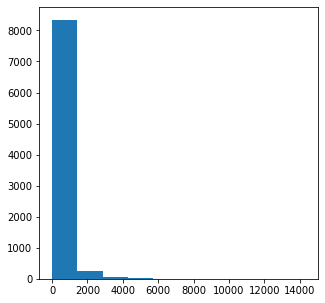

In [125]:
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(x=train_df['RoomService'])
plt.show()

In [126]:
# Handle Outliers
## 1) replace with median (here, ZERO), 2) check correlation who pay for it 

## 1.4 Scaling